# First trial: generate vectors with factors and try visualizing them with UMAP, T-SNE and PCA

## First let's play with primefac a bit

In [1]:
import primefac
import random

In [2]:
for n in range(1, 20):
    print(n, list(primefac.primefac(n)))

1 []
2 [2]
3 [3]
4 [2, 2]
5 [5]
6 [2, 3]
7 [7]
8 [2, 2, 2]
9 [3, 3]
10 [2, 5]
11 [11]
12 [2, 2, 3]
13 [13]
14 [2, 7]
15 [3, 5]
16 [2, 2, 2, 2]
17 [17]
18 [2, 3, 3]
19 [19]


In [3]:
print(list(primefac.primefac(9999)))

[3, 3, 11, 101]


## Now let's make the vectors

With each number from 1 to 1,000,000 we will do the following:
1. Factor it into primes using `primefac`
2. Count the occurrences of primes in the factorization using `collections.Counter`
3. Vectorize the counts using `sklearn.feature_extraction.DictVectorizer`

In [4]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer

In [5]:
N = 100000
shuffle = False

In [6]:
%%time
prime_counts = [Counter(primefac.primefac(n)) for n in range(1, N + 1)]
if shuffle:
    random.shuffle(prime_counts)

CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 587 ms


In [7]:
%%time
vectorizer = DictVectorizer()
X = vectorizer.fit_transform(prime_counts)

CPU times: user 165 ms, sys: 0 ns, total: 165 ms
Wall time: 171 ms


In [8]:
X.shape

(100000, 9592)

This is the correct number of primes according to [this page](https://yutsumura.com/find-the-largest-prime-number-less-than-one-million/).

---

## Generate the UMAP reduction and plot

In [9]:
import umap
import umap.plot
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%%time
embedding = umap.UMAP(metric='cosine', n_epochs=500, low_memory=True, verbose=True).fit_transform(X)

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=500, verbose=True)
Fri Nov 25 12:04:32 2022 Construct fuzzy simplicial set
Fri Nov 25 12:04:32 2022 Finding Nearest Neighbors
Fri Nov 25 12:04:32 2022 Building RP forest with 21 trees
Fri Nov 25 12:04:46 2022 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	Stopping threshold met -- exiting after 9 iterations
Fri Nov 25 12:05:20 2022 Finished Nearest Neighbor Search
Fri Nov 25 12:05:22 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Nov 25 12:06:52 2022 Finished embedding
CPU times: user 31min 40s, sys: 39.2 s, total: 32min 19s
Wall time: 2min 20s


## Save the results and generate the plot

This code is copied from the [gist linked](https://gist.github.com/johnhw/dfc7b8b8519aac530ac97da226c17bd5) in the original article.



In [11]:
# save for later
np.savez('1e6_pts.npz', embedding=embedding)

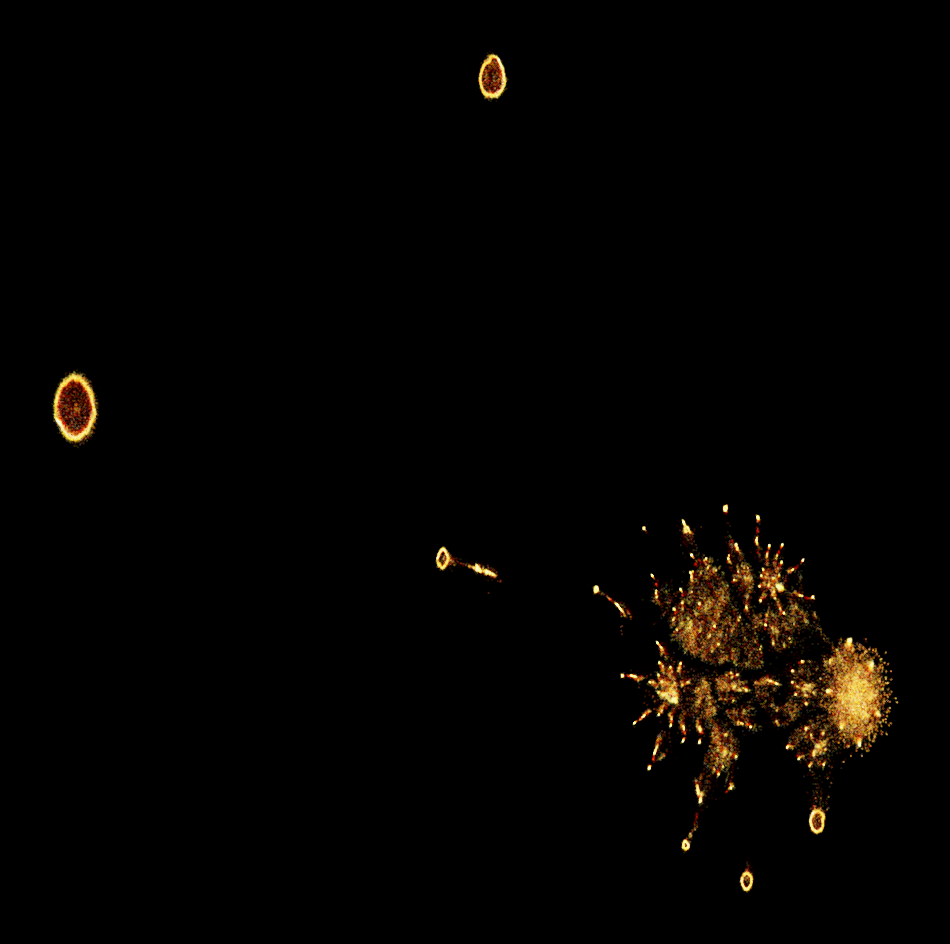

In [12]:


# and save the image
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=0.005, c=np.arange(N), cmap=plt.get_cmap("hot"))

plt.axis("off")
#plt.savefig("primes_umap_1e6_16k_smaller_pts.png", dpi=2000, facecolor='black')
plt.show()

In [13]:
d1 = 17
d2 = 2

def colfun(n):
    if n % d1 == 0 and n % d2 == 0:
        return "purple"
    elif n % d1 == 0:
        return "blue"
    elif n % d2 == 0:
        return "red"
    return "white"

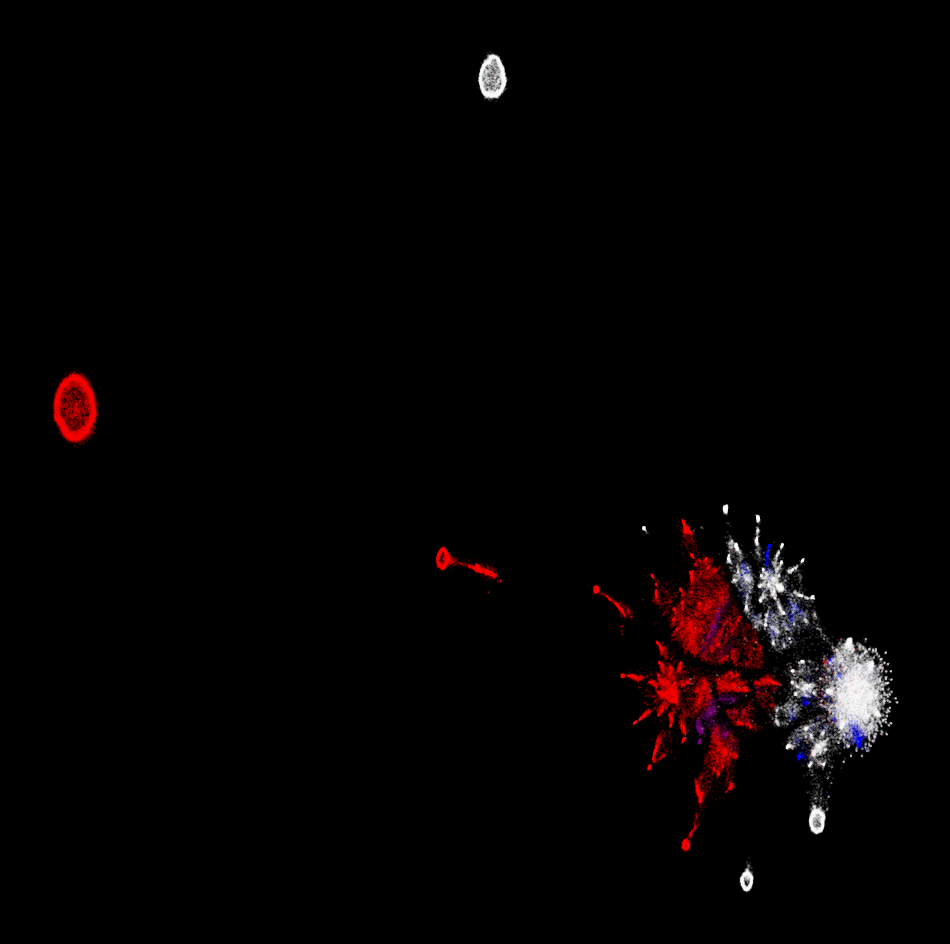

In [14]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
#colors = ["red" if set(primefac.primefac(n)) == {2} else "white" for n in range(1, N+1)]
colors = [colfun(n) for n in range(1, N + 1)]
plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=0.005, c=colors)

plt.axis("off")
plt.show()

## Now try with TSNE

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(verbose=10, metric="cosine")

In [17]:
%%time
tsne_embedding = tsne.fit_transform(X)

/mnt/c/Users/rkingan/Documents/venv/nviz/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/c/Users/rkingan/Documents/venv/nviz/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.001s...
[t-SNE] Computed neighbors for 100000 samples in 141.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

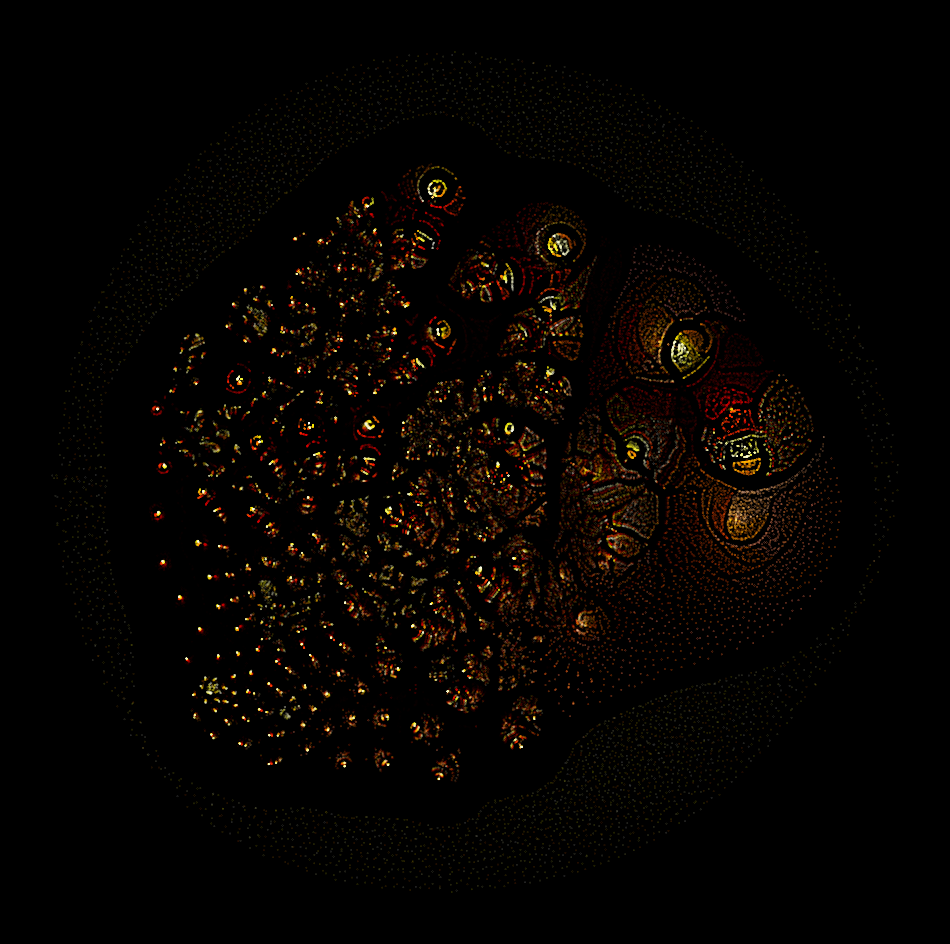

In [18]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], marker='o', s=0.005, c=np.arange(N), cmap=plt.get_cmap("hot"))

plt.axis("off")
#plt.savefig("primes_umap_1e6_16k_smaller_pts.png", dpi=2000, facecolor='black')
plt.show()

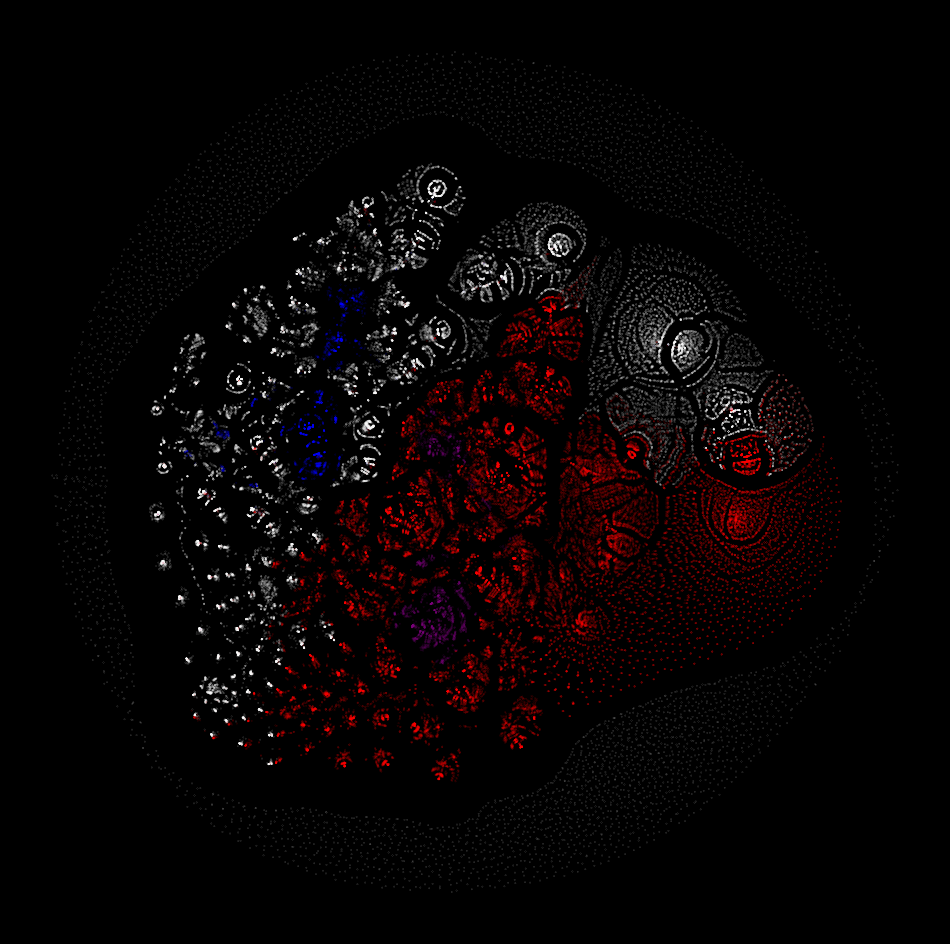

In [19]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
#colors = ["red" if set(primefac.primefac(n)) == {2} else "white" for n in range(1, N+1)]
colors = [colfun(n) for n in range(1, N + 1)]
plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], marker='o', s=0.005, c=colors)

plt.axis("off")
plt.show()

## And finally, PCA (actually TruncatedSVD because PCA doesn't support sparse matrices)

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
tsvd = TruncatedSVD()

In [23]:
%%time

tsvd_embedding = tsvd.fit_transform(X)

CPU times: user 795 ms, sys: 1.57 s, total: 2.37 s
Wall time: 195 ms


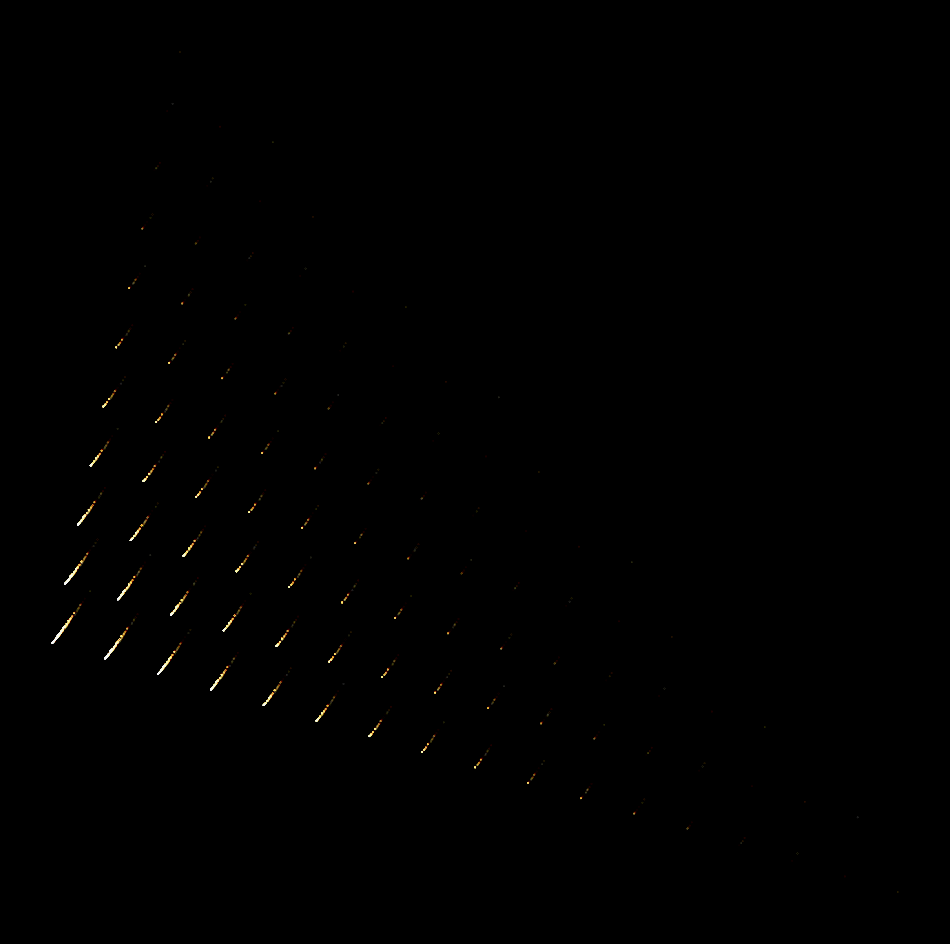

In [24]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
plt.scatter(tsvd_embedding[:,0], tsvd_embedding[:,1], marker='o', s=0.005, c=np.arange(N), cmap=plt.get_cmap("hot"))

plt.axis("off")
#plt.savefig("primes_umap_1e6_16k_smaller_pts.png", dpi=2000, facecolor='black')
plt.show()

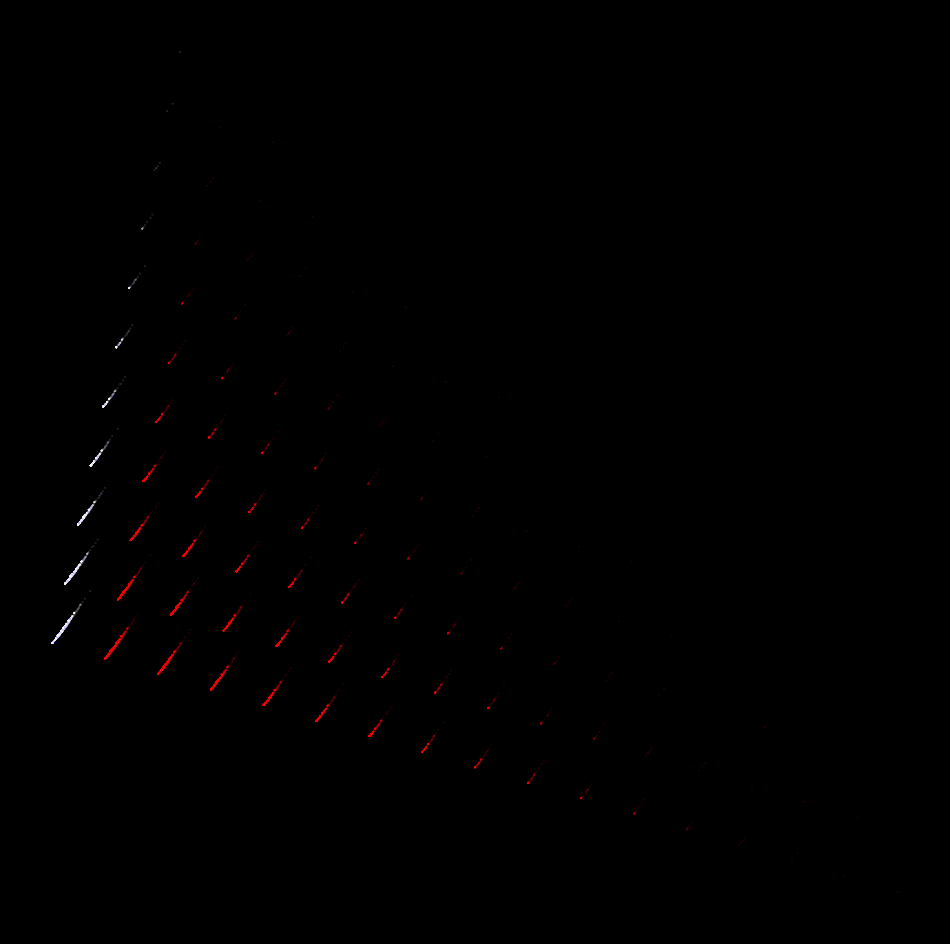

In [25]:
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('black')
#colors = ["red" if set(primefac.primefac(n)) == {2} else "white" for n in range(1, N+1)]
colors = [colfun(n) for n in range(1, N + 1)]
plt.scatter(tsvd_embedding[:,0], tsvd_embedding[:,1], marker='o', s=0.005, c=colors)

plt.axis("off")
plt.show()